<AxesSubplot:xlabel='x', ylabel='y'>

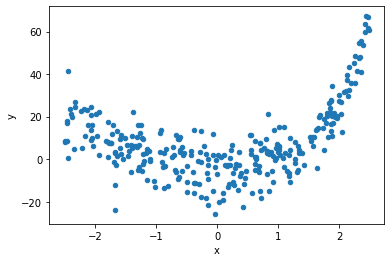

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.neighbors
from sklearn.metrics import mean_squared_error
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.to_csv('dane_do_regresji.csv',index=None)
df.plot.scatter(x='x',y='y')

In [2]:
#wynikowy dataframe

In [3]:
result = pd.DataFrame({'train_mse':np.zeros(7),'test_mse':np.zeros(7)}, index = ['lin_reg','knn_3_reg','knn_5_reg',
                                     'poly_2_reg','poly_3_reg','poly_4_reg','poly_5_reg'] )

In [4]:
print(df)

            x          y
0   -0.725697   5.825234
1    1.266361   7.907711
2    1.799673  21.850195
3    1.956161  19.427829
4    1.179245  -7.677354
..        ...        ...
295 -0.383144 -15.827684
296 -2.441829  41.225833
297  0.814543   4.088380
298  1.007036  15.030144
299  2.389094  53.815873

[300 rows x 2 columns]


In [5]:
#losowy podział
shuffle_index = np.random.permutation(size)
df = df.reindex(index=shuffle_index)

In [6]:
train, test = df[:240], df[240:]

In [7]:
#REGRESJA LINIOWA

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train['x'].values.reshape(-1,1), train['y'].values)
print(lin_reg.intercept_, lin_reg.coef_, "\n")

7.6108890330032954 [4.45198674] 



In [9]:
#wykres dla danych testujących

            x          y
292 -2.452543  16.956991
212 -2.383270  21.183434
60  -2.325327  24.412298
218 -2.321500  26.912965
149 -2.179436  23.688848
46  -2.054415  16.026561
13  -1.926437  21.956356
38  -1.731678   7.776211
86  -1.667379 -23.749067
269 -1.588871   9.622496
164 -1.546592  -0.058219
154 -1.482093   6.900655
178 -1.413007   6.762425
129 -1.398643   5.435218
62  -1.225977   9.991361
276 -1.152978   4.960133
98  -1.146827  -9.856134
113 -1.018313 -12.882810
282 -0.941359  12.140582
73  -0.941020   3.334300
285 -0.882434  -3.482418
71  -0.806470 -12.490495
27  -0.738632   1.173333
65  -0.639309   9.595813
121 -0.603534  10.505237
116 -0.574761  -5.467726
93  -0.565951   1.773912
188 -0.432665   2.139160
295 -0.383144 -15.827684
194 -0.374668  13.825746
206 -0.354501 -10.985616
118 -0.060541   2.013248
53  -0.032826  -3.719979
266 -0.030149 -25.714403
201  0.180451 -13.137691
41   0.333564 -14.501340
246  0.359303   3.414634
196  0.389076  -6.310656
159  0.566574 -16.104400


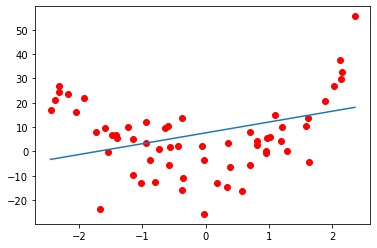

In [10]:
#dane testujące
test = test.sort_values('x')
print(test)
plt.plot(test['x'].values,test['y'].values,'ro')
#predykcja
plt.plot(test['x'].values, lin_reg.predict(test['x'].values.reshape(-1,1)))

In [11]:
#MSE

In [12]:
#dla danych uczących

In [13]:
result.at['lin_reg','train_mse'] = mean_squared_error(train['y'].values, lin_reg.predict(train['x'].values.reshape(-1,1)))

In [14]:
#dla danych testujących

In [15]:
result.at['lin_reg','test_mse'] = mean_squared_error(test['y'].values, lin_reg.predict(test['x'].values.reshape(-1,1)))

In [16]:
#KNN 3

In [17]:
knn_3_reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
knn_3_reg.fit(train['x'].values.reshape(-1,1), train['y'].values)

KNeighborsRegressor(n_neighbors=3)

            x          y
292 -2.452543  16.956991
212 -2.383270  21.183434
60  -2.325327  24.412298
218 -2.321500  26.912965
149 -2.179436  23.688848
46  -2.054415  16.026561
13  -1.926437  21.956356
38  -1.731678   7.776211
86  -1.667379 -23.749067
269 -1.588871   9.622496
164 -1.546592  -0.058219
154 -1.482093   6.900655
178 -1.413007   6.762425
129 -1.398643   5.435218
62  -1.225977   9.991361
276 -1.152978   4.960133
98  -1.146827  -9.856134
113 -1.018313 -12.882810
282 -0.941359  12.140582
73  -0.941020   3.334300
285 -0.882434  -3.482418
71  -0.806470 -12.490495
27  -0.738632   1.173333
65  -0.639309   9.595813
121 -0.603534  10.505237
116 -0.574761  -5.467726
93  -0.565951   1.773912
188 -0.432665   2.139160
295 -0.383144 -15.827684
194 -0.374668  13.825746
206 -0.354501 -10.985616
118 -0.060541   2.013248
53  -0.032826  -3.719979
266 -0.030149 -25.714403
201  0.180451 -13.137691
41   0.333564 -14.501340
246  0.359303   3.414634
196  0.389076  -6.310656
159  0.566574 -16.104400


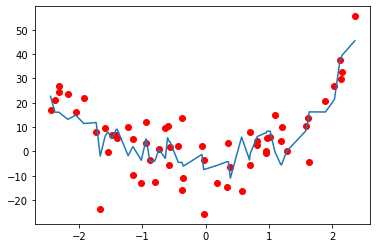

In [18]:
#wykres dla danych testujących
#dane testujące
test = test.sort_values('x')
print(test)
plt.plot(test['x'].values,test['y'].values,'ro')
#predykcja
plt.plot(test['x'].values,knn_3_reg.predict(test['x'].values.reshape(-1,1)))

In [19]:
#MSE

In [20]:
#dla danych uczących

In [21]:
result.at['knn_3_reg','train_mse'] = mean_squared_error(train['y'].values, knn_3_reg.predict(train['x'].values.reshape(-1,1)))

In [22]:
#dla danych testujących

In [23]:
result.at['knn_3_reg','test_mse'] = mean_squared_error(test['y'].values, knn_3_reg.predict(test['x'].values.reshape(-1,1)))

In [24]:
#KNN 5

In [25]:
knn_5_reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
knn_5_reg.fit(train['x'].values.reshape(-1,1), train['y'].values)

KNeighborsRegressor()

            x          y
292 -2.452543  16.956991
212 -2.383270  21.183434
60  -2.325327  24.412298
218 -2.321500  26.912965
149 -2.179436  23.688848
46  -2.054415  16.026561
13  -1.926437  21.956356
38  -1.731678   7.776211
86  -1.667379 -23.749067
269 -1.588871   9.622496
164 -1.546592  -0.058219
154 -1.482093   6.900655
178 -1.413007   6.762425
129 -1.398643   5.435218
62  -1.225977   9.991361
276 -1.152978   4.960133
98  -1.146827  -9.856134
113 -1.018313 -12.882810
282 -0.941359  12.140582
73  -0.941020   3.334300
285 -0.882434  -3.482418
71  -0.806470 -12.490495
27  -0.738632   1.173333
65  -0.639309   9.595813
121 -0.603534  10.505237
116 -0.574761  -5.467726
93  -0.565951   1.773912
188 -0.432665   2.139160
295 -0.383144 -15.827684
194 -0.374668  13.825746
206 -0.354501 -10.985616
118 -0.060541   2.013248
53  -0.032826  -3.719979
266 -0.030149 -25.714403
201  0.180451 -13.137691
41   0.333564 -14.501340
246  0.359303   3.414634
196  0.389076  -6.310656
159  0.566574 -16.104400


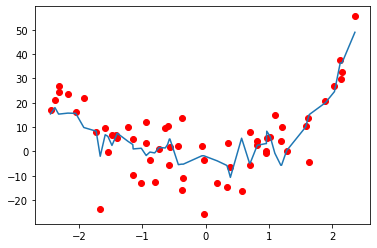

In [26]:
#wykres dla danych testujących
#dane testujące
test = test.sort_values('x')
print(test)
plt.plot(test['x'].values,test['y'].values,'ro')
#predykcja
plt.plot(test['x'].values,knn_5_reg.predict(test['x'].values.reshape(-1,1)))

In [27]:
#MSE

In [28]:
#dla danych uczących

In [29]:
result.at['knn_5_reg','train_mse'] = mean_squared_error(train['y'].values, knn_5_reg.predict(train['x'].values.reshape(-1,1)))

In [30]:
#dla danych testujących

In [31]:
result.at['knn_5_reg','test_mse'] = mean_squared_error(test['y'].values, knn_5_reg.predict(test['x'].values.reshape(-1,1)))

In [32]:
#POLYNOMIAL REGRESSION - degree: 2

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature_2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_feature_2.fit_transform(train['x'].values.reshape(-1,1))
print(X[0], X_poly[0])
poly_2_reg = LinearRegression()
poly_2_reg.fit(X_poly, train['y'].values)

-0.7256973682369989 [0.54378699 0.29570429]


LinearRegression()

            x          y
292 -2.452543  16.956991
212 -2.383270  21.183434
60  -2.325327  24.412298
218 -2.321500  26.912965
149 -2.179436  23.688848
46  -2.054415  16.026561
13  -1.926437  21.956356
38  -1.731678   7.776211
86  -1.667379 -23.749067
269 -1.588871   9.622496
164 -1.546592  -0.058219
154 -1.482093   6.900655
178 -1.413007   6.762425
129 -1.398643   5.435218
62  -1.225977   9.991361
276 -1.152978   4.960133
98  -1.146827  -9.856134
113 -1.018313 -12.882810
282 -0.941359  12.140582
73  -0.941020   3.334300
285 -0.882434  -3.482418
71  -0.806470 -12.490495
27  -0.738632   1.173333
65  -0.639309   9.595813
121 -0.603534  10.505237
116 -0.574761  -5.467726
93  -0.565951   1.773912
188 -0.432665   2.139160
295 -0.383144 -15.827684
194 -0.374668  13.825746
206 -0.354501 -10.985616
118 -0.060541   2.013248
53  -0.032826  -3.719979
266 -0.030149 -25.714403
201  0.180451 -13.137691
41   0.333564 -14.501340
246  0.359303   3.414634
196  0.389076  -6.310656
159  0.566574 -16.104400


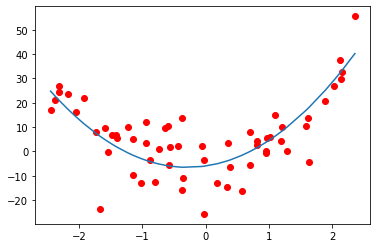

In [34]:
#wykres dla danych testujących
#dane testujące
test = test.sort_values('x')
print(test)
plt.plot(test['x'].values,test['y'].values,'ro')
#predykcja
plt.plot(test['x'].values,poly_2_reg.predict(poly_feature_2.fit_transform(test['x'].values.reshape(-1,1))))

In [35]:
#MSE

In [36]:
#dla danych uczących

In [37]:
result.at['poly_2_reg','train_mse'] = mean_squared_error(train['y'].values, poly_2_reg.predict(poly_feature_2.fit_transform(train['x'].values.reshape(-1,1))))

In [38]:
#dla danych testujących

In [39]:
result.at['poly_2_reg','test_mse'] = mean_squared_error(test['y'].values, poly_2_reg.predict(poly_feature_2.fit_transform(test['x'].values.reshape(-1,1))))

In [40]:
#POLYNOMIAL REGRESSION - degree: 3

In [41]:
poly_feature_3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_feature_3.fit_transform(train['x'].values.reshape(-1,1))
print(X[0], X_poly[0])
poly_3_reg = LinearRegression()
poly_3_reg.fit(X_poly, train['y'].values)

-0.7256973682369989 [0.54378699 0.29570429 0.16080014]


LinearRegression()

            x          y
292 -2.452543  16.956991
212 -2.383270  21.183434
60  -2.325327  24.412298
218 -2.321500  26.912965
149 -2.179436  23.688848
46  -2.054415  16.026561
13  -1.926437  21.956356
38  -1.731678   7.776211
86  -1.667379 -23.749067
269 -1.588871   9.622496
164 -1.546592  -0.058219
154 -1.482093   6.900655
178 -1.413007   6.762425
129 -1.398643   5.435218
62  -1.225977   9.991361
276 -1.152978   4.960133
98  -1.146827  -9.856134
113 -1.018313 -12.882810
282 -0.941359  12.140582
73  -0.941020   3.334300
285 -0.882434  -3.482418
71  -0.806470 -12.490495
27  -0.738632   1.173333
65  -0.639309   9.595813
121 -0.603534  10.505237
116 -0.574761  -5.467726
93  -0.565951   1.773912
188 -0.432665   2.139160
295 -0.383144 -15.827684
194 -0.374668  13.825746
206 -0.354501 -10.985616
118 -0.060541   2.013248
53  -0.032826  -3.719979
266 -0.030149 -25.714403
201  0.180451 -13.137691
41   0.333564 -14.501340
246  0.359303   3.414634
196  0.389076  -6.310656
159  0.566574 -16.104400


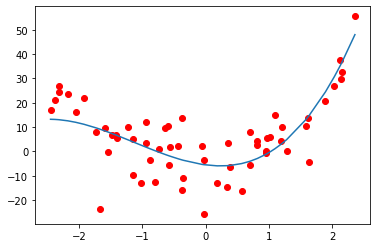

In [42]:
#wykres dla danych testujących
#dane testujące
test = test.sort_values('x')
print(test)
plt.plot(test['x'].values,test['y'].values,'ro')
#predykcja
plt.plot(test['x'].values,poly_3_reg.predict(poly_feature_3.fit_transform(test['x'].values.reshape(-1,1))))

In [43]:
#MSE

In [44]:
#dla danych uczących

In [45]:
result.at['poly_3_reg','train_mse'] = mean_squared_error(train['y'].values, poly_3_reg.predict(poly_feature_3.fit_transform(train['x'].values.reshape(-1,1))))

In [46]:
#dla danych testujących

In [47]:
result.at['poly_3_reg','test_mse'] = mean_squared_error(test['y'].values, poly_3_reg.predict(poly_feature_3.fit_transform(test['x'].values.reshape(-1,1))))

In [48]:
#POLYNOMIAL REGRESSION - degree: 4

In [49]:
poly_feature_4 = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_feature_4.fit_transform(train['x'].values.reshape(-1,1))
print(X[0], X_poly[0])
poly_4_reg = LinearRegression()
poly_4_reg.fit(X_poly, train['y'].values)

-0.7256973682369989 [0.54378699 0.29570429 0.16080014 0.08744103]


LinearRegression()

            x          y
292 -2.452543  16.956991
212 -2.383270  21.183434
60  -2.325327  24.412298
218 -2.321500  26.912965
149 -2.179436  23.688848
46  -2.054415  16.026561
13  -1.926437  21.956356
38  -1.731678   7.776211
86  -1.667379 -23.749067
269 -1.588871   9.622496
164 -1.546592  -0.058219
154 -1.482093   6.900655
178 -1.413007   6.762425
129 -1.398643   5.435218
62  -1.225977   9.991361
276 -1.152978   4.960133
98  -1.146827  -9.856134
113 -1.018313 -12.882810
282 -0.941359  12.140582
73  -0.941020   3.334300
285 -0.882434  -3.482418
71  -0.806470 -12.490495
27  -0.738632   1.173333
65  -0.639309   9.595813
121 -0.603534  10.505237
116 -0.574761  -5.467726
93  -0.565951   1.773912
188 -0.432665   2.139160
295 -0.383144 -15.827684
194 -0.374668  13.825746
206 -0.354501 -10.985616
118 -0.060541   2.013248
53  -0.032826  -3.719979
266 -0.030149 -25.714403
201  0.180451 -13.137691
41   0.333564 -14.501340
246  0.359303   3.414634
196  0.389076  -6.310656
159  0.566574 -16.104400


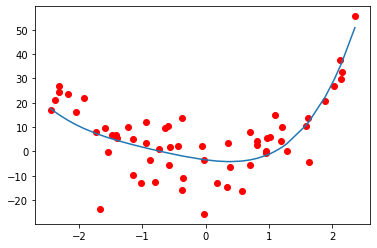

In [50]:
#wykres dla danych testujących
#dane testujące
test = test.sort_values('x')
print(test)
plt.plot(test['x'].values,test['y'].values,'ro')
#predykcja
plt.plot(test['x'].values,poly_4_reg.predict(poly_feature_4.fit_transform(test['x'].values.reshape(-1,1))))

In [51]:
#MSE

In [52]:
#dla danych uczących

In [53]:
result.at['poly_4_reg','train_mse'] = mean_squared_error(train['y'].values, poly_4_reg.predict(poly_feature_4.fit_transform(train['x'].values.reshape(-1,1))))

In [54]:
#dla danych testujących

In [55]:
result.at['poly_4_reg','test_mse'] = mean_squared_error(test['y'].values, poly_4_reg.predict(poly_feature_4.fit_transform(test['x'].values.reshape(-1,1))))

In [56]:
#POLYNOMIAL REGRESSION - degree: 5

In [57]:
poly_feature_5 = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_feature_5.fit_transform(train['x'].values.reshape(-1,1))
print(X[0], X_poly[0])
poly_5_reg = LinearRegression()
poly_5_reg.fit(X_poly, train['y'].values)

-0.7256973682369989 [0.54378699 0.29570429 0.16080014 0.08744103 0.04754929]


LinearRegression()

            x          y
292 -2.452543  16.956991
212 -2.383270  21.183434
60  -2.325327  24.412298
218 -2.321500  26.912965
149 -2.179436  23.688848
46  -2.054415  16.026561
13  -1.926437  21.956356
38  -1.731678   7.776211
86  -1.667379 -23.749067
269 -1.588871   9.622496
164 -1.546592  -0.058219
154 -1.482093   6.900655
178 -1.413007   6.762425
129 -1.398643   5.435218
62  -1.225977   9.991361
276 -1.152978   4.960133
98  -1.146827  -9.856134
113 -1.018313 -12.882810
282 -0.941359  12.140582
73  -0.941020   3.334300
285 -0.882434  -3.482418
71  -0.806470 -12.490495
27  -0.738632   1.173333
65  -0.639309   9.595813
121 -0.603534  10.505237
116 -0.574761  -5.467726
93  -0.565951   1.773912
188 -0.432665   2.139160
295 -0.383144 -15.827684
194 -0.374668  13.825746
206 -0.354501 -10.985616
118 -0.060541   2.013248
53  -0.032826  -3.719979
266 -0.030149 -25.714403
201  0.180451 -13.137691
41   0.333564 -14.501340
246  0.359303   3.414634
196  0.389076  -6.310656
159  0.566574 -16.104400


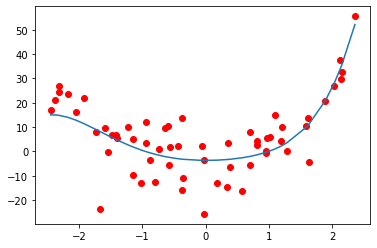

In [58]:
#wykres dla danych testujących
#dane testujące
test = test.sort_values('x')
print(test)
plt.plot(test['x'].values,test['y'].values,'ro')
#predykcja
plt.plot(test['x'].values,poly_5_reg.predict(poly_feature_5.fit_transform(test['x'].values.reshape(-1,1))))

In [59]:
#MSE

In [60]:
#dla danych uczących

In [61]:
result.at['poly_5_reg','train_mse'] = mean_squared_error(train['y'].values, poly_5_reg.predict(poly_feature_5.fit_transform(train['x'].values.reshape(-1,1))))

In [62]:
#dla danych testujących

In [63]:
result.at['poly_5_reg','test_mse'] = mean_squared_error(test['y'].values, poly_5_reg.predict(poly_feature_5.fit_transform(test['x'].values.reshape(-1,1))))

In [64]:
#result dataframe --> pickle

In [65]:
import pickle as pkl
fileObject = open("mse.pkl", 'wb')
pkl.dump(result, fileObject)
fileObject.close()

In [70]:
print(result)

             train_mse    test_mse
lin_reg     239.032550  230.001126
knn_3_reg    42.885928   82.326084
knn_5_reg    49.558841   86.131192
poly_2_reg   86.384909   86.866851
poly_3_reg   65.726127   88.061923
poly_4_reg   61.994197   83.250616
poly_5_reg   60.132953   81.740472


In [67]:
#lista krotek z regresorami

In [68]:
tuples = [(lin_reg, None), (knn_3_reg, None), (knn_5_reg, None), (poly_2_reg,
poly_feature_2), (poly_3_reg, poly_feature_3), (poly_4_reg, poly_feature_4),
(poly_5_reg, poly_feature_5)]


In [69]:
fileObject = open("reg.pkl", 'wb')
pkl.dump(tuples, fileObject)
fileObject.close()